# Этап 1 - Загрузка и просмотр датасетов

Подключим необходимые библиотеки для работы с данными

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

Методом read_csv загрузим каждый датасет в свой датафрейм

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

Выведем на экран каждый датафрейм и методом info() просмотрим общую информацию о нем

### users

In [3]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица содержит следующую информацию:
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом
* city — город проживания пользователя
* tariff — название тарифного плана

Для столбцов churn_date и reg_date необходимо изменить тип данных с object на datetime. 

Необходимо проверить пользователей на уникальность (столбец user_id и сочетание столбцов first_name last_name и city)

### calls

In [5]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица содержит следующую информацию:
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

В столбце call_date необходимо изменить тип данных с object на datetime.

В связи с тем что при учете звонков время округляется вверх до минут необходимо будет преобразовать значения из столбца duration в тип int с округлением вверх.

После изменения типа данных в столбце call_date мы извлечем из него информацию о месяце в котором был совершен звонок и сохраним ее в новый столбец, следом за этим мы сгруппируем эту таблицу по user_id и месяцам.

В таблице содержится информация о звонках с нулевой длительностью (предположим что так в таблице отображаются пропущенные вызовы), так как оценивать по каждому пользователю мы будем сгруппированую по месяцам информацию - эти данные нам не помешают, кроме того, при необходимости, мы сможем оценить активность пользователей с учетом этих данных.

### messages

In [7]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица содержит следующую информацию:
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

В столбце message_date необходимо изменить тип данных с object на datetime.

После изменения типа данных в столбце call_date мы извлечем из него информацию о месяце в котором был совершен звонок и сохраним ее в новый столбец, следом за этим мы сгруппируем эту таблицу по user_id и месяцам.

### internet

In [9]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица должна содержать следующую информацию:
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

В таблице обнаружен столбец Unnamed: 0 который, видимо, повторяет индекс таблицы, необходимо будет удалить этот столбец.

В столбце session_date необходимо изменить тип данных с object на datetime.

В связи с тем что на тарифах трафик округляется вверх до целых мегабайт необходимо будет преобразовать значения из столбца mb_used в тип int с округлением вверх.

После изменения типа данных в столбце session_date мы извлечем из него информацию о месяце в котором был совершен звонок и сохраним ее в новый столбец, следом за этим мы сгруппируем эту таблицу по user_id и месяцам.

В таблице содержится информация о сессиях в которых было принято 0 мегабайт, так как оценивать по каждому пользователю мы будем сгруппированую по месяцам информацию - эти данные нам не помешают.

### tariffs

In [11]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица содержит следующую информацию:
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета

Таблица в порядке.

## Вывод
Мы загрузили таблицы в отдельные датафреймы, провели беглый анализ содержащейся в них информации и типов данных и обнаружили следующее:

Пропущенных значений нет (только обоснованные пропуски в столбце churn_date таблицы users).

Во всех таблицах которые содержат информацию о датах (users, calls, messages, internet) необходимо изменить тип данных соответствующих столбцов с object на datetime.

В таблицы calls, messages, internet мы должны добавить новые столбцы содержащие информацию о месяце в котором произошло событие (звонок, сообщение, выход в интернет).

В таблицах calls и internet информацию о длительности звонка и сведения о количестве потраченных за сессию мегабайт необходмо округлить до целых (с огруглением вверх)

Таблицу users необходимо проверить на уникальность пользователей (по столбцу user_id; по сочетанию столбцов first_name last_name и city)

Из таблицы internet необходимо удалить столбец Unnamed: 0 (в нем содержится копия индекса таблицы)

Таблица tariffs изменений не требует.

# Этап 2 - Подготовка данных к анализу

## Проверка таблиц, изменение типов данных, добавление столбцов

### users

Изменим тип данных в столбцах reg_date и churn_date

In [13]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

Проверим количество уникальных user_id

In [14]:
len(users['user_id'].unique())

500

Количество уникальных user_id совпадает с количеством строк в таблице, значит дублей нет.

Проверим таблицу на уникальность пользователей по сочетанию Город+Имя+Фамилия, для этого создадим новый временный столбец unique_user

In [15]:
users['unique_user'] = users['city'] + users['first_name'] + users['last_name']
len(users['unique_user'].unique())

500

Количество уникальных пользователей совпадает с длиной таблицы, значит среди уникальных user_id все пользователи на самом деле уникальны и ничего суммировать не придется, удалим временный столбец

In [16]:
users = users.drop('unique_user', axis=1)

Теперь проверим все столбцы таблицы на минимальные и максимальные значения, это позволит нам увидеть данные резко выбивающиеся из таблицы (если они есть)

In [17]:
pd.concat([users.min(), users.max()], axis=1, keys=['min', 'max'])

,min,max
user_id,1000,1499
age,18,75
churn_date,2018-08-17 00:00:00,2018-12-30 00:00:00
city,Архангельск,Ярославль
first_name,Авксентий,Яна
last_name,Ёлчина,Яшина
reg_date,2018-01-01 00:00:00,2018-12-31 00:00:00
tariff,smart,ultra


Минимумы и максимумы в столбцах выглядят нормально

Проведем проверку содержимого столбца tariff для того чтобы убедится что среди пользоватлей встречаются только абоненты тарифов Смарт и Ультра

In [18]:
users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

Неверных значений в столбце tariff нет

###  calls

Изменим тип данных в столбце call_date

In [19]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

Методом библиотеки pandas DatetimeIndex определим месяц совершения звонка и запишем его в новый столбец

In [20]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

Для округления длительности звонка вверх до целых значений воспользуемся методом ceil из библиотеки numpy

In [21]:
calls['duration'] = np.ceil(calls['duration'])

Проверим все столбцы таблицы на минимальные и максимальные значения

In [22]:
pd.concat([calls.min(), calls.max()], axis=1, keys=['min', 'max'])

,min,max
id,1000_0,1499_99
call_date,2018-01-01 00:00:00,2018-12-31 00:00:00
duration,0,38
user_id,1000,1499
month,1,12


Явно ошибочных значений нет

### messages

Изменим тип данных в столбце message_date

In [23]:
messages['message_date'] = pd.to_datetime(messages['message_date'])

Определим месяц отправки сообщения

In [24]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

Проверим все столбцы таблицы на минимальные и максимальные значения

In [25]:
pd.concat([messages.min(), messages.max()], axis=1, keys=['min', 'max'])

,min,max
id,1000_0,1499_99
message_date,2018-01-02 00:00:00,2018-12-31 00:00:00
user_id,1000,1499
month,1,12


Минимумы и максимумы нормальные

### internet

Изменим тип данных в столбце session_date

In [26]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

Определим месяц начала сессии

In [27]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

Округлим (вверх) значения из столбца mb_used

In [28]:
internet['mb_used'] = np.ceil(internet['mb_used'])

Удалим столбец Unnamed: 0

In [29]:
internet = internet.drop('Unnamed: 0', axis=1)

Проверим все столбцы таблицы на минимальные и максимальные значения

In [30]:
pd.concat([internet.min(), internet.max()], axis=1, keys=['min', 'max'])

,min,max
id,1000_0,1499_99
mb_used,0,1725
session_date,2018-01-01 00:00:00,2018-12-31 00:00:00
user_id,1000,1499
month,1,12


Выдающиеся минимумы и максимумы отсутствуют

### tariffs

Для того чтобы названия столбцов содержащих наименования тарифов совпадали в таблицах users и tariffs переименуем его из tariff_name в tariff

In [31]:
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

## Группировка данных

###  Минут в месяц по каждому пользователю

Создадим сводную таблицу на основе таблицы calls (свод по столбцам user_id и month) и посчитаем сумму и количество по столбцу duration

In [32]:
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count']).reset_index()
calls_pivot.columns = ['user_id', 'month', 'calls_duration', 'calls_count']

Присоединим к сводной таблице сведения о тарифе пользователя и информацию о лимите минут и их стоимости сверх лимита

In [33]:
calls_pivot = calls_pivot.merge(users[['user_id','tariff']], on='user_id', how='left')
calls_pivot = calls_pivot.merge(tariffs[['tariff','minutes_included', 'rub_per_minute']], on='tariff', how='left')

На основе присоединенных данных рассчитаем сколько пользователь заплатил за минуты сверх лимита в каждом месяце

In [34]:
calls_pivot['minutes_over_lim'] = calls_pivot['calls_duration'] - calls_pivot['minutes_included']
calls_pivot.loc[calls_pivot['minutes_over_lim'] < 0, 'minutes_over_lim'] = 0
calls_pivot['minutes_payed'] = calls_pivot['minutes_over_lim'] * calls_pivot['rub_per_minute']

Выведем таблицу на экран

In [35]:
calls_pivot

,user_id,month,calls_duration,calls_count,tariff,minutes_included,rub_per_minute,minutes_over_lim,minutes_payed
0,1000,5,159.0,22,ultra,3000,1,0.0,0.0
1,1000,6,172.0,43,ultra,3000,1,0.0,0.0
2,1000,7,340.0,47,ultra,3000,1,0.0,0.0
3,1000,8,408.0,52,ultra,3000,1,0.0,0.0
4,1000,9,466.0,58,ultra,3000,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3169,1498,10,247.0,41,smart,500,3,0.0,0.0
3170,1499,9,70.0,9,smart,500,3,0.0,0.0
3171,1499,10,449.0,68,smart,500,3,0.0,0.0
3172,1499,11,612.0,74,smart,500,3,112.0,336.0


###  Сообщений в месяц по каждому пользователю

Создадим сводную таблицу на основе таблицы messages (свод по столбцам user_id и month) и посчитаем количество по столбцу id

In [36]:
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages_pivot.columns = ['user_id', 'month', 'messages_count']

Присоединим к ней сведения о тарифе пользователя и информацию о лимите сообщений

In [37]:
messages_pivot = messages_pivot.merge(users[['user_id','tariff']], on='user_id', how='left')
messages_pivot = messages_pivot.merge(tariffs[['tariff','messages_included', 'rub_per_message']], on='tariff', how='left')

Рассчитаем сколько пользователь заплатил за сообщения отправленные сверх лимита

In [38]:
messages_pivot['messages_over_lim'] = messages_pivot['messages_count'] - messages_pivot['messages_included']
messages_pivot.loc[messages_pivot['messages_over_lim'] < 0, 'messages_over_lim'] = 0
messages_pivot['messages_payed'] = messages_pivot['messages_over_lim'] * messages_pivot['rub_per_message']

Выведем таблицу на экран

In [39]:
messages_pivot

,user_id,month,messages_count,tariff,messages_included,rub_per_message,messages_over_lim,messages_payed
0,1000,5,22,ultra,1000,1,0,0
1,1000,6,60,ultra,1000,1,0,0
2,1000,7,75,ultra,1000,1,0,0
3,1000,8,81,ultra,1000,1,0,0
4,1000,9,57,ultra,1000,1,0,0
...,...,...,...,...,...,...,...,...
2712,1498,10,42,smart,50,3,0,0
2713,1499,9,11,smart,50,3,0,0
2714,1499,10,48,smart,50,3,0,0
2715,1499,11,59,smart,50,3,9,27


###  Трафик в месяц по каждому пользователю

Создадим сводную таблицу на основе таблицы internet (свод по столбцам user_id и message_month) и посчитаем сумму по столбцу mb_used

In [40]:
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()

Присоединим к ней сведения о тарифе пользователя и информацию о лимите сообщений

In [41]:
internet_pivot = internet_pivot.merge(users[['user_id','tariff']], on='user_id', how='left')
internet_pivot = internet_pivot.merge(tariffs[['tariff','mb_per_month_included', 'rub_per_gb']], on='tariff', how='left')

Рассчитаем сколько пользователь заплатил за сообщения отправленные сверх лимита

In [42]:
internet_pivot['internet_over_lim'] = internet_pivot['mb_used'] - internet_pivot['mb_per_month_included']
internet_pivot.loc[internet_pivot['internet_over_lim'] < 0, 'internet_over_lim'] = 0
internet_pivot['gb_buyed'] = np.ceil(internet_pivot['internet_over_lim'] / 1024)
internet_pivot['internet_payed'] = internet_pivot['gb_buyed'] * internet_pivot['rub_per_gb']

Выведем таблицу на экран

In [43]:
internet_pivot

,user_id,month,mb_used,tariff,mb_per_month_included,rub_per_gb,internet_over_lim,gb_buyed,internet_payed
0,1000,5,2256.0,ultra,30720,150,0.0,0.0,0.0
1,1000,6,23257.0,ultra,30720,150,0.0,0.0,0.0
2,1000,7,14016.0,ultra,30720,150,0.0,0.0,0.0
3,1000,8,14070.0,ultra,30720,150,0.0,0.0,0.0
4,1000,9,14581.0,ultra,30720,150,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3198,1498,10,20604.0,smart,15360,200,5244.0,6.0,1200.0
3199,1499,9,1848.0,smart,15360,200,0.0,0.0,0.0
3200,1499,10,17809.0,smart,15360,200,2449.0,3.0,600.0
3201,1499,11,17984.0,smart,15360,200,2624.0,3.0,600.0


### Месяцы которые пользователь оплачивал абонентскую плату

Рассчитаем месяцы которые пользователь был абонентом оператора Мегалайн, условимся в том что при регистрации пользователь должен заплатить абонентскую плату за месяц вперед

Нам необходимо выяснить сколько месяцев абонент пользовался тарифом, так как данные для анализа у нас за 2018 год то все пропуски в столбце churn_date таблицы users заполним датой 31.12.2018

In [44]:
users['churn_date'] = users['churn_date'].fillna(pd.to_datetime('2018-12-31'))

Добавим в users два стоолбца с месяцами регистрации и расторжения договора (либо конца года)

In [45]:
users['reg_month'] = pd.DatetimeIndex(users['reg_date']).month
users['end_month'] = pd.DatetimeIndex(users['churn_date']).month

Создадим массив data содержащий месяцы которые прошли с момента регистрации абонента до момента расторжения договора (либо до конца года)

In [46]:
data = []
for row in users.index:
    start = users.loc[row, 'reg_month']
    end = users.loc[row, 'end_month']
    for month in range(start,end+1):
        data.append([users.loc[row, 'user_id'], month])

Запишем созданный массив в новый датафрейм

In [47]:
months_active = pd.DataFrame(data, columns=['user_id', 'month'])
months_active

,user_id,month
0,1000,5
1,1000,6
2,1000,7
3,1000,8
4,1000,9
...,...,...
3211,1498,10
3212,1499,9
3213,1499,10
3214,1499,11


### Итоговая таблица для анализа

Методом merge, к таблице содержащей месяцы активности пользователя добавим следующее:
* из таблицы users тариф, возраст и город абонента
* из таблицы tariffs количество ежемесячной абонентской платы
* из таблицы calls_pivot ежемесячное количество минут, количество звонков, количество и стоимость минут сверх лимита
* из таблицы messages_pivot ежемесячное количество сообщений, количество и стоимость сообщений сверх лимита
* из таблицы internet_pivot ежемесячное количество трафика, количество и стоимость трафика сверх лимита

In [48]:
df = months_active.merge(users[['user_id','tariff','age','city']], on='user_id', how='left')
df = df.merge(tariffs[['tariff','rub_monthly_fee']], on='tariff', how='left')
df = df.merge(calls_pivot[['user_id','month','calls_duration','calls_count','minutes_over_lim','minutes_payed']], on=['user_id','month'], how='left')
df = df.merge(messages_pivot[['user_id','month','messages_count','messages_over_lim','messages_payed']], on=['user_id','month'], how='left')
df = df.merge(internet_pivot[['user_id','month','mb_used','internet_over_lim','internet_payed']], on=['user_id','month'], how='left')

Так как для объединения таблиц мы использовали метод merge с параметром left то в итоговой таблице у нас появились пустые яйчеки

In [49]:
df.isnull().sum()

user_id                0
month                  0
tariff                 0
age                    0
city                   0
rub_monthly_fee        0
calls_duration        42
calls_count           42
minutes_over_lim      42
minutes_payed         42
messages_count       499
messages_over_lim    499
messages_payed       499
mb_used               13
internet_over_lim     13
internet_payed        13
dtype: int64

Заполним их нулем

In [50]:
df = df.fillna(0)

Рассчитаем итоговое количество выручки в месяц по каждому абоненту

In [51]:
df['overpayed'] = df['minutes_payed'] + df['messages_payed'] + df['internet_payed']
df['user_revenue'] = df['rub_monthly_fee'] + df['overpayed']

Проверим типы данных в таблице

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 18 columns):
user_id              3216 non-null int64
month                3216 non-null int64
tariff               3216 non-null object
age                  3216 non-null int64
city                 3216 non-null object
rub_monthly_fee      3216 non-null int64
calls_duration       3216 non-null float64
calls_count          3216 non-null float64
minutes_over_lim     3216 non-null float64
minutes_payed        3216 non-null float64
messages_count       3216 non-null float64
messages_over_lim    3216 non-null float64
messages_payed       3216 non-null float64
mb_used              3216 non-null float64
internet_over_lim    3216 non-null float64
internet_payed       3216 non-null float64
overpayed            3216 non-null float64
user_revenue         3216 non-null float64
dtypes: float64(12), int64(4), object(2)
memory usage: 477.4+ KB


Приведем все содержимое столбцов с типом данных float в int и выведем таблицу на экран

In [53]:
df[['calls_duration', 'calls_count', 'minutes_over_lim', 'minutes_payed','messages_count', 'messages_over_lim', 'messages_payed', 'mb_used','internet_over_lim', 'internet_payed', 'overpayed', 'user_revenue']] = df[['calls_duration', 'calls_count', 'minutes_over_lim', 'minutes_payed','messages_count', 'messages_over_lim', 'messages_payed', 'mb_used','internet_over_lim', 'internet_payed', 'overpayed', 'user_revenue']].astype('int')
df

,user_id,month,tariff,age,city,rub_monthly_fee,calls_duration,calls_count,minutes_over_lim,minutes_payed,messages_count,messages_over_lim,messages_payed,mb_used,internet_over_lim,internet_payed,overpayed,user_revenue
0,1000,5,ultra,52,Краснодар,1950,159,22,0,0,22,0,0,2256,0,0,0,1950
1,1000,6,ultra,52,Краснодар,1950,172,43,0,0,60,0,0,23257,0,0,0,1950
2,1000,7,ultra,52,Краснодар,1950,340,47,0,0,75,0,0,14016,0,0,0,1950
3,1000,8,ultra,52,Краснодар,1950,408,52,0,0,81,0,0,14070,0,0,0,1950
4,1000,9,ultra,52,Краснодар,1950,466,58,0,0,57,0,0,14581,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,10,smart,68,Владикавказ,550,247,41,0,0,42,0,0,20604,5244,1200,1200,1750
3212,1499,9,smart,35,Пермь,550,70,9,0,0,11,0,0,1848,0,0,0,550
3213,1499,10,smart,35,Пермь,550,449,68,0,0,48,0,0,17809,2449,600,600,1150
3214,1499,11,smart,35,Пермь,550,612,74,112,336,59,9,27,17984,2624,600,963,1513


## Вывод
Мы провели в таблицах изменения намеченные на первом этапе (преобразование типов, исправление некоторых ошибок, добавление новых столбцов).

Далее мы сгруппировали для каждого пользователя данные таблиц calls, messages и internet по месяцам. 

Создали новую таблицу в которой записали для каждого абонента месяца активности в 2018 году. 

В итоге мы объединили все расчеты в одной таблице на основании которой рассчитали ежемесячную активность абонентов и количество выручки которую они принесли.

# Этап 3 - Анализ данных

### Выручка по каждому тарифу

Ответим на вопрос сколько выручки принес каждый тариф с учетом абонентской платы и дополнительных услуг

In [54]:
revenue = df.pivot_table(index='tariff', values=['rub_monthly_fee','overpayed','user_revenue'], aggfunc='sum')[['user_revenue','rub_monthly_fee','overpayed']].round()
revenue['%fee'] = (revenue['rub_monthly_fee'] / revenue['user_revenue'] * 100).round(2)
revenue['%over'] = (revenue['overpayed'] / revenue['user_revenue'] * 100).round(2)
revenue

,user_revenue,rub_monthly_fee,overpayed,%fee,%over
tariff,,,,,
smart,2886301,1226500,1659801,42.49,57.51
ultra,2041950,1922700,119250,94.16,5.84


Пользователи тарифа Смарт принесли оператору на 30% больше выручки чем абоненты тарифа Ультра, причем стоит отметить то что большая часть этой выручки состоит не из абонентской платы, а из платы за связь сверх лимитов установленных тарифом

В среднем по каждому абоненту выручка распределена следующим образом

In [55]:
df.pivot_table(index='tariff', values=['rub_monthly_fee','overpayed','user_revenue'], aggfunc='mean')[['user_revenue','rub_monthly_fee','overpayed']].round(2)

,user_revenue,rub_monthly_fee,overpayed
tariff,,,
smart,1294.31,550,744.31
ultra,2070.94,1950,120.94


Если судить только по среднему значению абоненты с тарифом smart тратят на связь все таки меньше чем абоненты с тарифом ultra. Построим гистограммы распределения выручки по пользователям для того чтобы проверить так ли это

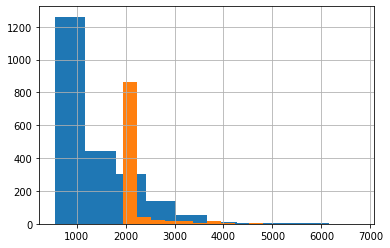

In [56]:
df.query('tariff == "smart"')['user_revenue'].hist()
df.query('tariff == "ultra"')['user_revenue'].hist()

На графике мы видим что часть пользователей тарифа smart на самом деле платит меньше чем абоненты с тарифом ultra но часть пользователей платит больше

In [57]:
pd.concat([df.query('tariff == "smart"')['user_revenue'].describe().round(2),
           df.query('tariff == "ultra"')['user_revenue'].describe().round(2)], 
          axis=1,
          keys=['smart','ultra'])

,smart,ultra
count,2230.00,986.00
mean,1294.31,2070.94
std,820.90,378.63
min,550.00,1950.00
25%,550.00,1950.00
50%,1037.00,1950.00
75%,1750.00,1950.00
max,6770.00,4800.00


Распределение по квартилям показывает что пользователи которые переплачивают за связь сверх абонентской платы есть на обоих тарифах, но если тарифе ultra они все попали в последний квартиль, то на на тарифе smart более 50% пользователей не укладываются в лимиты

In [58]:
pd.concat([df[['tariff','user_id']].drop_duplicates()['tariff'].value_counts(),
           df.query('overpayed > 0')[['tariff','user_id']].drop_duplicates()['tariff'].value_counts()], 
          axis=1, 
          keys=['total', 'overpayed'])

,total,overpayed
smart,351,333
ultra,149,43


333 (95%) и 43 (29%) пользователя тарифов smart и ultra соотвественно не уложились в лимиты, но в среднем пользователь тарифа ultra переплатил 121 рубль, что составляет 6% его абонентской платы, а пользователь тарифа smart переплатил 744 рубля, что превышает его абонентскую плату на 35%

Постоим гистограммы распределения по этому показателю

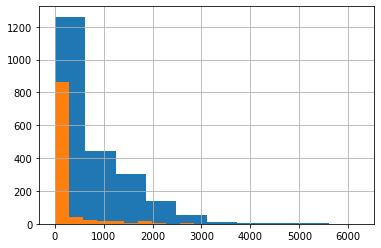

In [59]:
df.query('tariff == "smart"')['overpayed'].hist()
df.query('tariff == "ultra"')['overpayed'].hist()

In [60]:
pd.concat([df.query('tariff == "smart"')['overpayed'].describe().round(2),
           df.query('tariff == "ultra"')['overpayed'].describe().round(2)], 
          axis=1,
          keys=['smart','ultra'])

,smart,ultra
count,2230.00,986.00
mean,744.31,120.94
std,820.90,378.63
min,0.00,0.00
25%,0.00,0.00
50%,487.00,0.00
75%,1200.00,0.00
max,6220.00,2850.00


Распределение переплат на гистограмме и по квартилям похоже на распределение выручки от пользователей: большая часть пользователей тарифа smart не укладывается в лимиты

### Потребности пользователей

Выведем на экран средние значения количества потраченных пользователями разных тарифов минут, сообщений и мегабайт, дополним сводную таблицу лимитами включенными в тариф

In [61]:
df.pivot_table(index='tariff', values=['calls_duration','messages_count','mb_used'], aggfunc='mean').round(2).merge(tariffs[['tariff','messages_included','mb_per_month_included','minutes_included']], on='tariff')[['tariff','calls_duration','minutes_included','messages_count','messages_included','mb_used','mb_per_month_included']]

,tariff,calls_duration,minutes_included,messages_count,messages_included,mb_used,mb_per_month_included
0,smart,417.75,500,33.37,50,16221.91,15360
1,ultra,526.09,3000,49.31,1000,19467.14,30720


На первый взгляд, нигде, кроме интернета на тарифе smart, превышений нет, но мы знаем, что 95% и 29% пользователей не укладываются в лимиты

#### Тариф smart

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e1deb7ed0>,
      dtype=object)

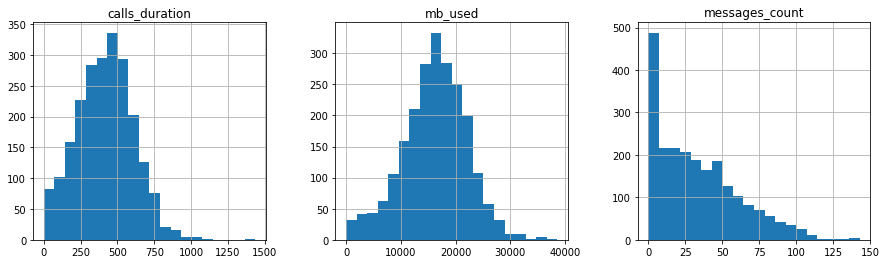

In [62]:
df.query('tariff == "smart"').hist(['calls_duration','messages_count','mb_used'], bins=20, figsize=(15,4), layout=(1,3))

Распределения длительности звонков и использованного трафика похожи на нормальные. Половина пользователей укладываются в лимиты, другая половина нет, проверим основные статистические показатели.

In [63]:
df.query('tariff == "smart"')[['calls_duration','mb_used','messages_count']].describe(percentiles=[0.1,0.9]).round()

,calls_duration,mb_used,messages_count
count,2230.0,2230.0,2230.0
mean,418.0,16222.0,33.0
std,190.0,5886.0,28.0
min,0.0,0.0,0.0
10%,166.0,8506.0,0.0
50%,422.0,16529.0,28.0
90%,658.0,23249.0,73.0
max,1435.0,38610.0,143.0


Распределение по перцентилям подтвердило наше предположение - 90% значений использованых минут и мегабайт помещаются в интервал +-3 стандартных отклонения (с небольшим перекосом из за выбросов который мы не будем убирать в этом исследовании), медиана и среднее очень близки - распределения похожи на нормальные

Распределение количества отправленных сообщений похоже на распределение Пуассона.

Посчитаем количество пользователей превыщающих лимиты и среднее превышение по тарифу smart

In [64]:
print('user count calls_duration', len(df.query('tariff == "smart" & calls_duration > 500')['user_id'].unique()))
print('user count mb_used', len(df.query('tariff == "smart" & mb_used > 15260')['user_id'].unique()))
print('user count messages_count', len(df.query('tariff == "smart" & messages_count > 50')['user_id'].unique()))

user count calls_duration 213
user count mb_used 313
user count messages_count 125


In [65]:
print('ovel limit calls_duration',df.query('tariff == "smart" & calls_duration > 500')['minutes_over_lim'].median().round())
print('ovel limit mb_used',df.query('tariff == "smart" & mb_used > 15260')['internet_over_lim'].median().round())
print('ovel limit messages_count',df.query('tariff == "smart" & messages_count > 50')['messages_over_lim'].median().round())

ovel limit calls_duration 100.0
ovel limit mb_used 4006.0
ovel limit messages_count 18.0


В среднем превышающий лимиты абонент тарифа smart (а их 95%) тратит сверх абонентской платы:
* 213 (61%) абонентов превышает лимит по звонкам на 100 минут (+300 руб)
* 313 (89%) абонентов превышает лимит по трафику на 4006 МБ (+800 руб) 
* 125 (36%) абонентов превышает лимит по сообщениям на 18 сообщений (+54 руб) 

#### Тариф ultra

Построим гистограммы распределения

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e1deb7550>,
      dtype=object)

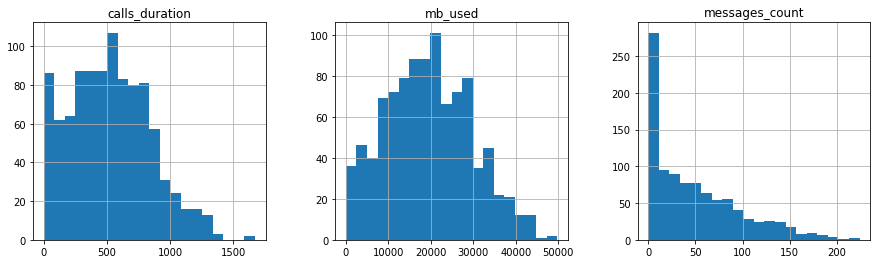

In [66]:
df.query('tariff == "ultra"').hist(['calls_duration','messages_count','mb_used'], bins=20, figsize=(15,4), layout=(1,3))

Распределение количества минут похоже на нормальное но при этом оно сильно скошенно влево 

Распределение трафика близко по виду к нормальному

Распределение количества сообщение так же как и у пользователей тарифа smart похоже на распределение Пуассона

In [67]:
df.query('tariff == "ultra"')[['calls_duration','mb_used','messages_count']].describe(percentiles=[0.25,0.75,0.90]).round()

,calls_duration,mb_used,messages_count
count,986.0,986.0,986.0
mean,526.0,19467.0,49.0
std,318.0,10110.0,48.0
min,0.0,0.0,0.0
25%,282.0,11761.0,6.0
50%,518.0,19320.0,38.0
75%,752.0,26860.0,79.0
90%,932.0,33004.0,122.0
max,1673.0,49789.0,224.0


Среднее и медиана близки, а значение на 90% укладывается в интервал +3 стандартных отклонения справа (1472 минуты и 49650 мегабайта), -3 стандартных отклонения влево уходят за нулевое значение

Все абоненты тарифа укладываются в лимиты по звонкам и сообщениям: 50% укладыются в 518 минут а 90% тратят не более 932 минут

В случае с интернет трафиком, большая часть пользователей в лимиты укладывается, но не все, посчитаем их количество

In [68]:
print('user count mb_used', len(df.query('tariff == "ultra" & mb_used > 30720')['user_id'].unique()))

user count mb_used 43


Всего 43 пользователя превысили лимиты, посчитаем среднее превышение:

In [69]:
print('ovel limit mb_used',df.query('tariff == "ultra" & mb_used > 30720')['internet_over_lim'].median().round())

ovel limit mb_used 4462.0


43 (29%) абонентов тарифа ultra превышают лимит интернет трафика на 4462 МБ что обходится им в 654 руб сверх абонентской платы

## Вывод
Мы провели анализ сформированной на втором этапе таблицы и обнаружили следующее.

Пользователи тарифа Смарт принесли оператору на 30% больше выручки чем абоненты тарифа Ультра (2 886 301 руб и 2 041 950 руб), причем стоит отметить то что большая часть выручки с тарифа Смарт состоит не из абонентской платы, а из платы за связь сверх лимитов установленных тарифом

В среднем абоненты тарифа Смарт потратили на связь 1294 рубля (из которых абонентская плата 550) а абоненты тарифа Ультра 2070 рублей (1950 рублей абонентская плата)

95% абонентов с тарифом Смарт и 29% абонентов с тарифом Ультра не уложились в лимиты

В среднем абонент тарифа Смарт тратит сверх абонентской платы:
* 213 (61%) абонентов превышает лимит по звонкам на 100 минут (+300 руб)
* 313 (89%) абонентов превышает лимит по трафику на 4006 МБ (+800 руб)
* 125 (36%) абонентов превышает лимит по сообщениям на 18 сообщений (+54 руб)

Абоненты тарифа Ультра превышают только лимиты интернет трафика, в среднем каждый из 43 таких абонентов превысил лимит на 4462 МБ и заплатил за трафик 654 рубля сверх абонентской платы

# Этап 4 - Проверка гипотез

Уровень значимости при проверке гипотез мы установим в 5% (ошибка в 5 случаев из 100) - не слишком строгий (так как от нашего исследования не зависят жизни людей) и не слишком мягкий (так как от принятия этих гипотез может зависеть прибыль компании

In [70]:
alpha = 0.05

### Гипотеза 1 - средняя выручка пользователей тарифов Ультра и Смарт различается

Для проведения статистического теста мы должны выдвинуть нулевую гипотезу о том что что средние выручки по тарифам равны, альтернативная гипотеза будет заключаться в том что уровни выручки различаются

Запишем выручки тарифов (по месяцам) в массивы

In [71]:
smart_revenue=[]
for i in df.query('tariff == "smart"')['user_revenue']:
    smart_revenue.append(i)

ultra_revenue=[]
for i in df.query('tariff == "ultra"')['user_revenue']:
    ultra_revenue.append(i)

Проверим дисперсии полученных массивов

In [72]:
print(np.var(smart_revenue))
print(np.var(ultra_revenue))

673575.4363387561
143215.03328546917


Дисперсии различаются, значит параметр Т-теста equal_var приравняем к False

Проведем Т-тест и сравним наблюдаемый уровень значимости с критическим

In [73]:
results1 = st.ttest_ind(smart_revenue,ultra_revenue,equal_var=False)

print('p-значение:', results1.pvalue)

if (results1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2414049931248708e-246
Отвергаем нулевую гипотезу


Наблюдаемый уровень значимости ЗНАЧИТЕЛЬНО ниже критического, это значит что мы должны отвергнуть нулевую гипотезу и принять альтернативную - средняя выручка пользователей тарифов Ультра и Смарт **различается**

### Гипотеза 2 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Нулевая гипотеза - средние выручки по тарифам жителей Москвы и остальных регионов равны

Альтернативная гипотеза - выручки различаются

Запишем выручки в массивы

In [74]:
moscow_revenue=[]
for i in df.query('city == "Москва"')['user_revenue']:
    moscow_revenue.append(i)

rest_revenue=[]
for i in df.query('city != "Москва"')['user_revenue']:
    rest_revenue.append(i)

Проверим дисперсии полученных массивов

In [75]:
print(np.var(moscow_revenue))
print(np.var(rest_revenue))

565256.3794161058
656445.8668799481


Дисперсии различаются, значит параметр Т-теста equal_var приравняем к False

Проведем статистический тест

In [76]:
results2 = st.ttest_ind(moscow_revenue,rest_revenue,equal_var=False)

print('p-значение:', results2.pvalue)

if (results2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5086199993481282
Не получилось отвергнуть нулевую гипотезу


Наблюдаемый уровень значимости выше критического, это значит что мы не можем отвергнуть нулевую гипотезу, следовательно мы можем считать что средние выручки пользователей из Москвы и из других регионов **равны**

## Вывод
Мы проверяли две гипотезы:

1. Средняя выручка пользователей тарифов Ультра и Смарт различается
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для проверки гипотез мы приняли критический уровень значимости 5% (ошибка в 5 случаях из 100) и выдвинули две нулевых гипотезы:

1. Средняя выручка пользователей тарифов Ультра и Смарт равна
2. Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

В результате проведенных статистичеких тестов мы:

1. Отвергли первую нулевую гипотезу
2. Не отклонили вторую нулевую гипотезу

Таким образом, пока не доказано обратное, мы можем считать что:

1. Средняя выручка пользователей тарифов Ультра и Смарт различается
2. Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

# Общий вывод
После загрузки информации из предоставленных файлов мы изменили тип данных всех столбцов с датами на datetime, округлили значения минут и мегабайт до целых (округление вверх) и исправили некоторые ошибки в предоставленных данных.

Далее мы сгруппировали для каждого пользователя количество минут, мегабайт и сообщений по месяцам и сохранили эту информацию в новой таблице в которой рассчитали превышение лимитов по тарифам, сумму этих превышений в рублях и выручку по каждому абоненту за каждый месяц.

Проведенный анализ собранной информации выявил что все вместе пользователи тарифа Смарт принесли оператору на 30% больше выручки чем абоненты тарифа Ультра (2 886 301 руб и 2 041 950 руб), но при этом в среднем абонент тарифа Смарт потратил на связь 1294 рубля в месяц (из которых абонентская плата 550) а абонент тарифа Ультра 2070 рублей (1950 рублей абонентская плата), таким образом можно сделать вывод, что целью будущей рекламной компании должно стать привлечение новых абонентов на тариф Ультра.

Детальный анализ поведения пользователей показал что 95% абонентов с тарифом Смарт и 29% абонентов с тарифом Ультра не уложились в лимиты связи.

Кроме того мы проверили две статистических гипотезы о средней выручке:

* о выручке пользователей тарифов Ультра и Смарт
* в выручке пользователей из Москвы и выручке пользователей из других регионов

И в результате проверки, пока не доказано обратное, мы можем считать что:

1.	Средняя выручка пользователей тарифов Ультра и Смарт различается
2.	Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
